In [216]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report,confusion_matrix

In [2]:
df=pd.read_csv('Churn_modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.shape

(10000, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.drop(['RowNumber','CustomerId','Surname'],axis='columns',inplace=True)
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [6]:
df.sample(4)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9952,724,Germany,Male,37,6,125489.40,1,1,0,118570.53,0
4984,553,France,Female,31,4,0.00,2,1,1,89087.40,0
461,539,France,Male,39,3,0.00,2,1,0,36692.17,0
1038,523,France,Male,30,1,83181.29,1,1,1,138176.78,0


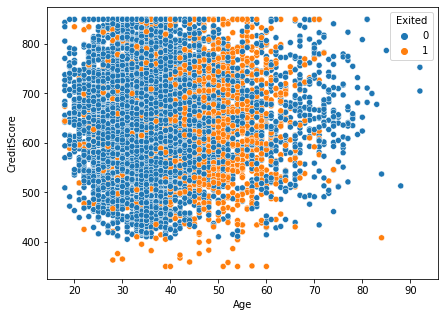

In [7]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df,x='Age',y='CreditScore',hue='Exited')
plt.show()

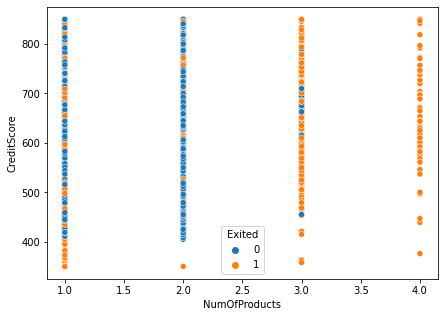

In [8]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df,x='NumOfProducts',y='CreditScore',hue='Exited')
plt.show()

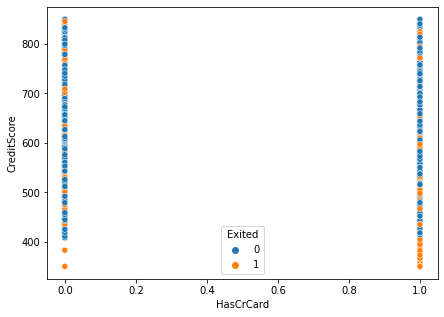

In [9]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df,x='HasCrCard',y='CreditScore',hue='Exited')
plt.show()

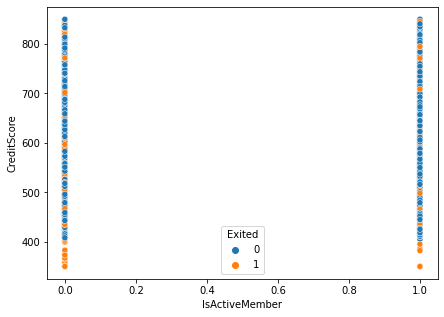

In [10]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df,x='IsActiveMember',y='CreditScore',hue='Exited')
plt.show()

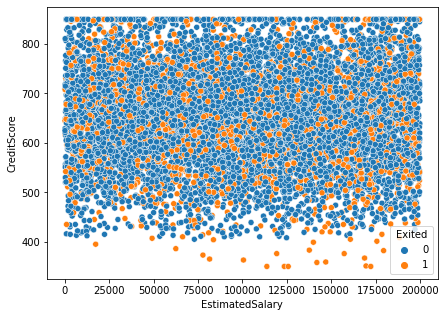

In [11]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df,x='EstimatedSalary',y='CreditScore',hue='Exited')
plt.show()

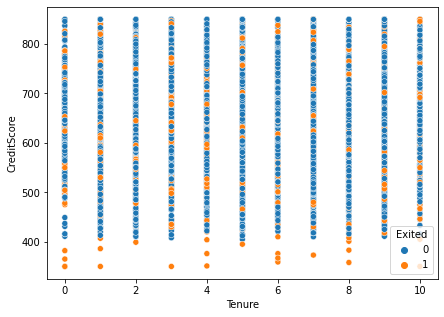

In [12]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df,x='Tenure',y='CreditScore',hue='Exited')
plt.show()

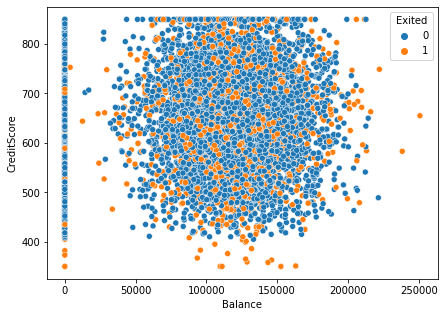

In [13]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df,x='Balance',y='CreditScore',hue='Exited')
plt.show()

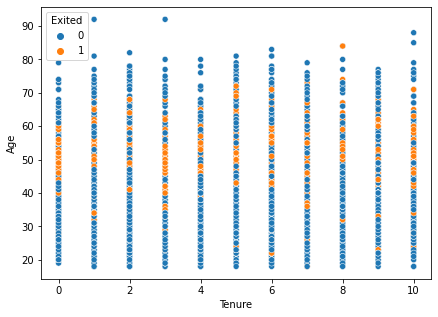

In [14]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df,x='Tenure',y='Age',hue='Exited')
plt.show()

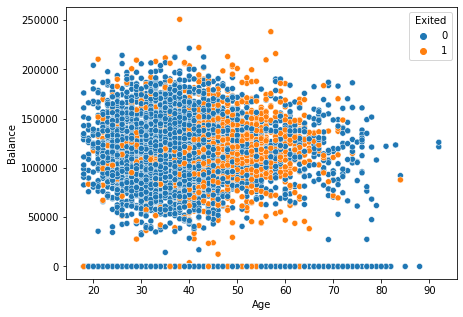

In [15]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df,x='Age',y='Balance',hue='Exited')
plt.show()

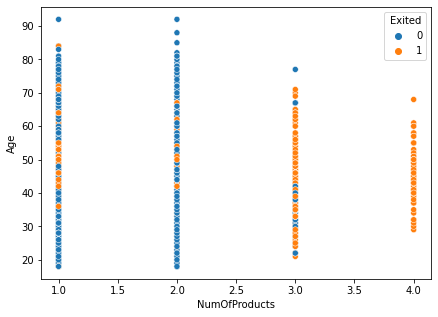

In [16]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df,x='NumOfProducts',y='Age',hue='Exited')
plt.show()

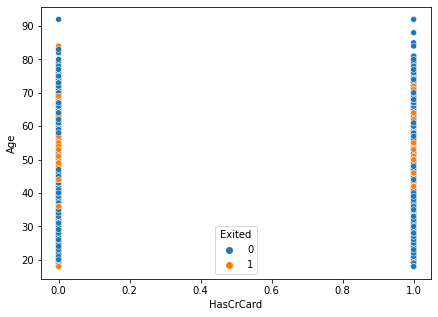

In [17]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df,x='HasCrCard',y='Age',hue='Exited')
plt.show()

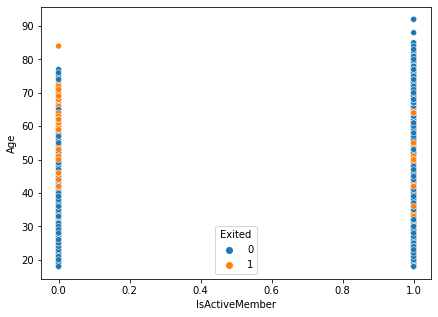

In [18]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df,x='IsActiveMember',y='Age',hue='Exited')
plt.show()

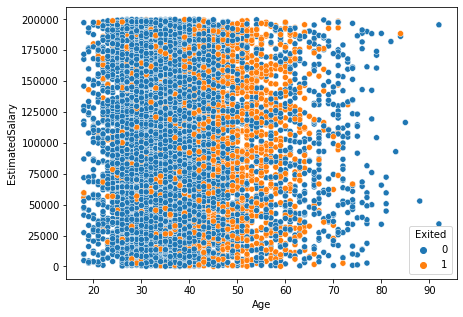

In [19]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df,x='Age',y='EstimatedSalary',hue='Exited')
plt.show()

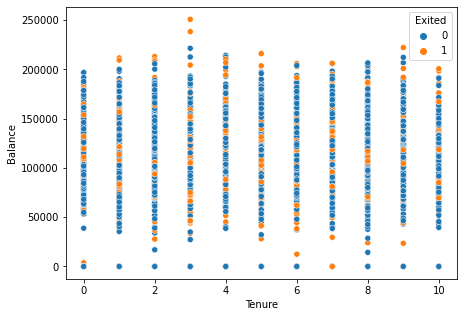

In [20]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df,x='Tenure',y='Balance',hue='Exited')
plt.show()

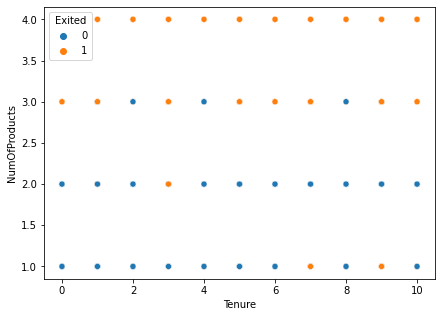

In [21]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df,x='Tenure',y='NumOfProducts',hue='Exited')
plt.show()

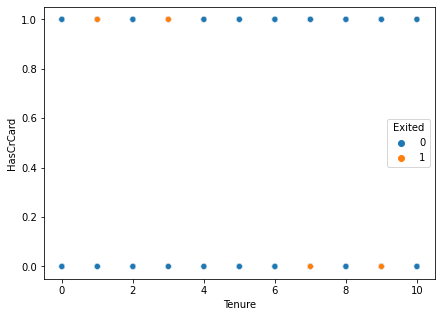

In [22]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df,x='Tenure',y='HasCrCard',hue='Exited')
plt.show()

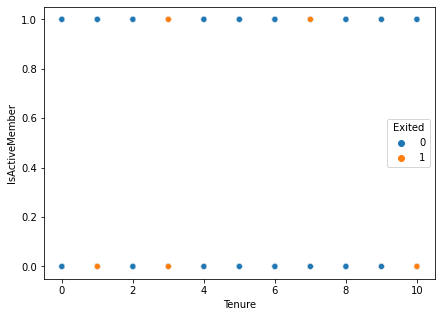

In [23]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df,x='Tenure',y='IsActiveMember',hue='Exited')
plt.show()

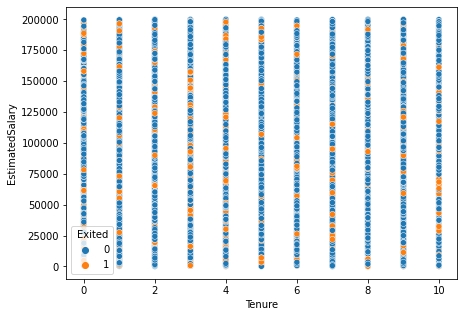

In [24]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df,x='Tenure',y='EstimatedSalary',hue='Exited')
plt.show()

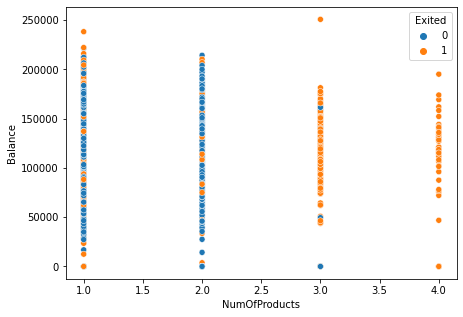

In [25]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df,x='NumOfProducts',y='Balance',hue='Exited')
plt.show()

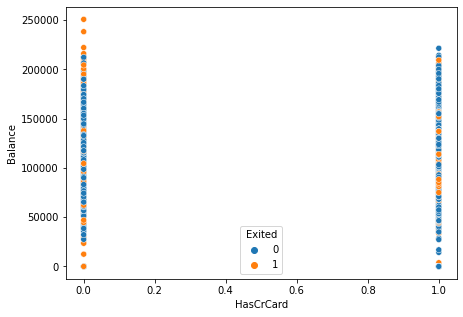

In [26]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df,x='HasCrCard',y='Balance',hue='Exited')
plt.show()

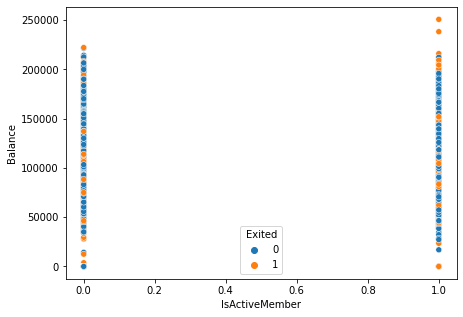

In [27]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df,x='IsActiveMember',y='Balance',hue='Exited')
plt.show()

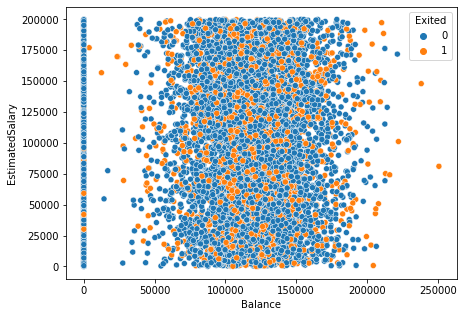

In [28]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df,x='Balance',y='EstimatedSalary',hue='Exited')
plt.show()

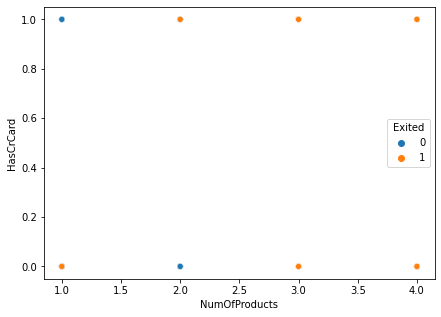

In [29]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df,x='NumOfProducts',y='HasCrCard',hue='Exited')
plt.show()

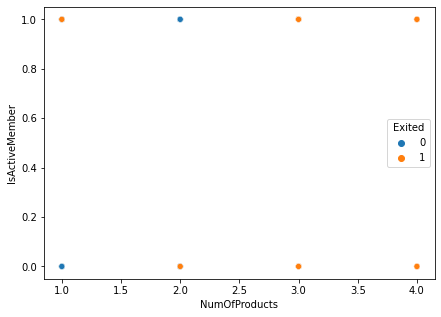

In [30]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df,x='NumOfProducts',y='IsActiveMember',hue='Exited')
plt.show()

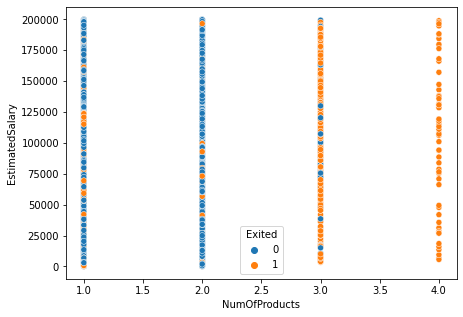

In [31]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df,x='NumOfProducts',y='EstimatedSalary',hue='Exited')
plt.show()

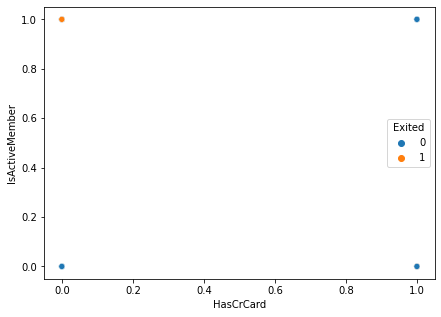

In [32]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df,x='HasCrCard',y='IsActiveMember',hue='Exited')
plt.show()

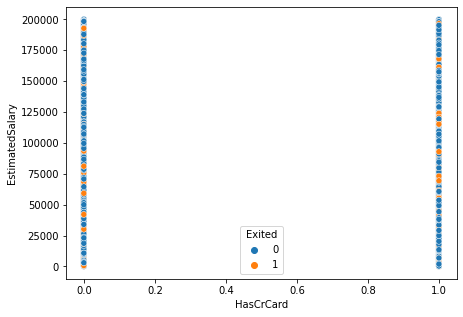

In [33]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df,x='HasCrCard',y='EstimatedSalary',hue='Exited')
plt.show()

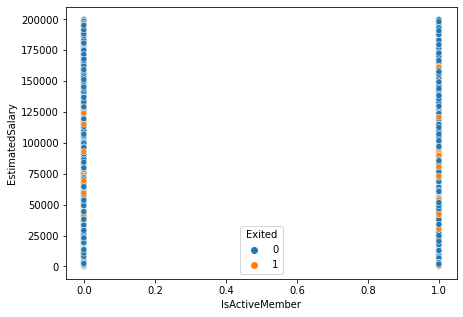

In [34]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df,x='IsActiveMember',y='EstimatedSalary',hue='Exited')
plt.show()

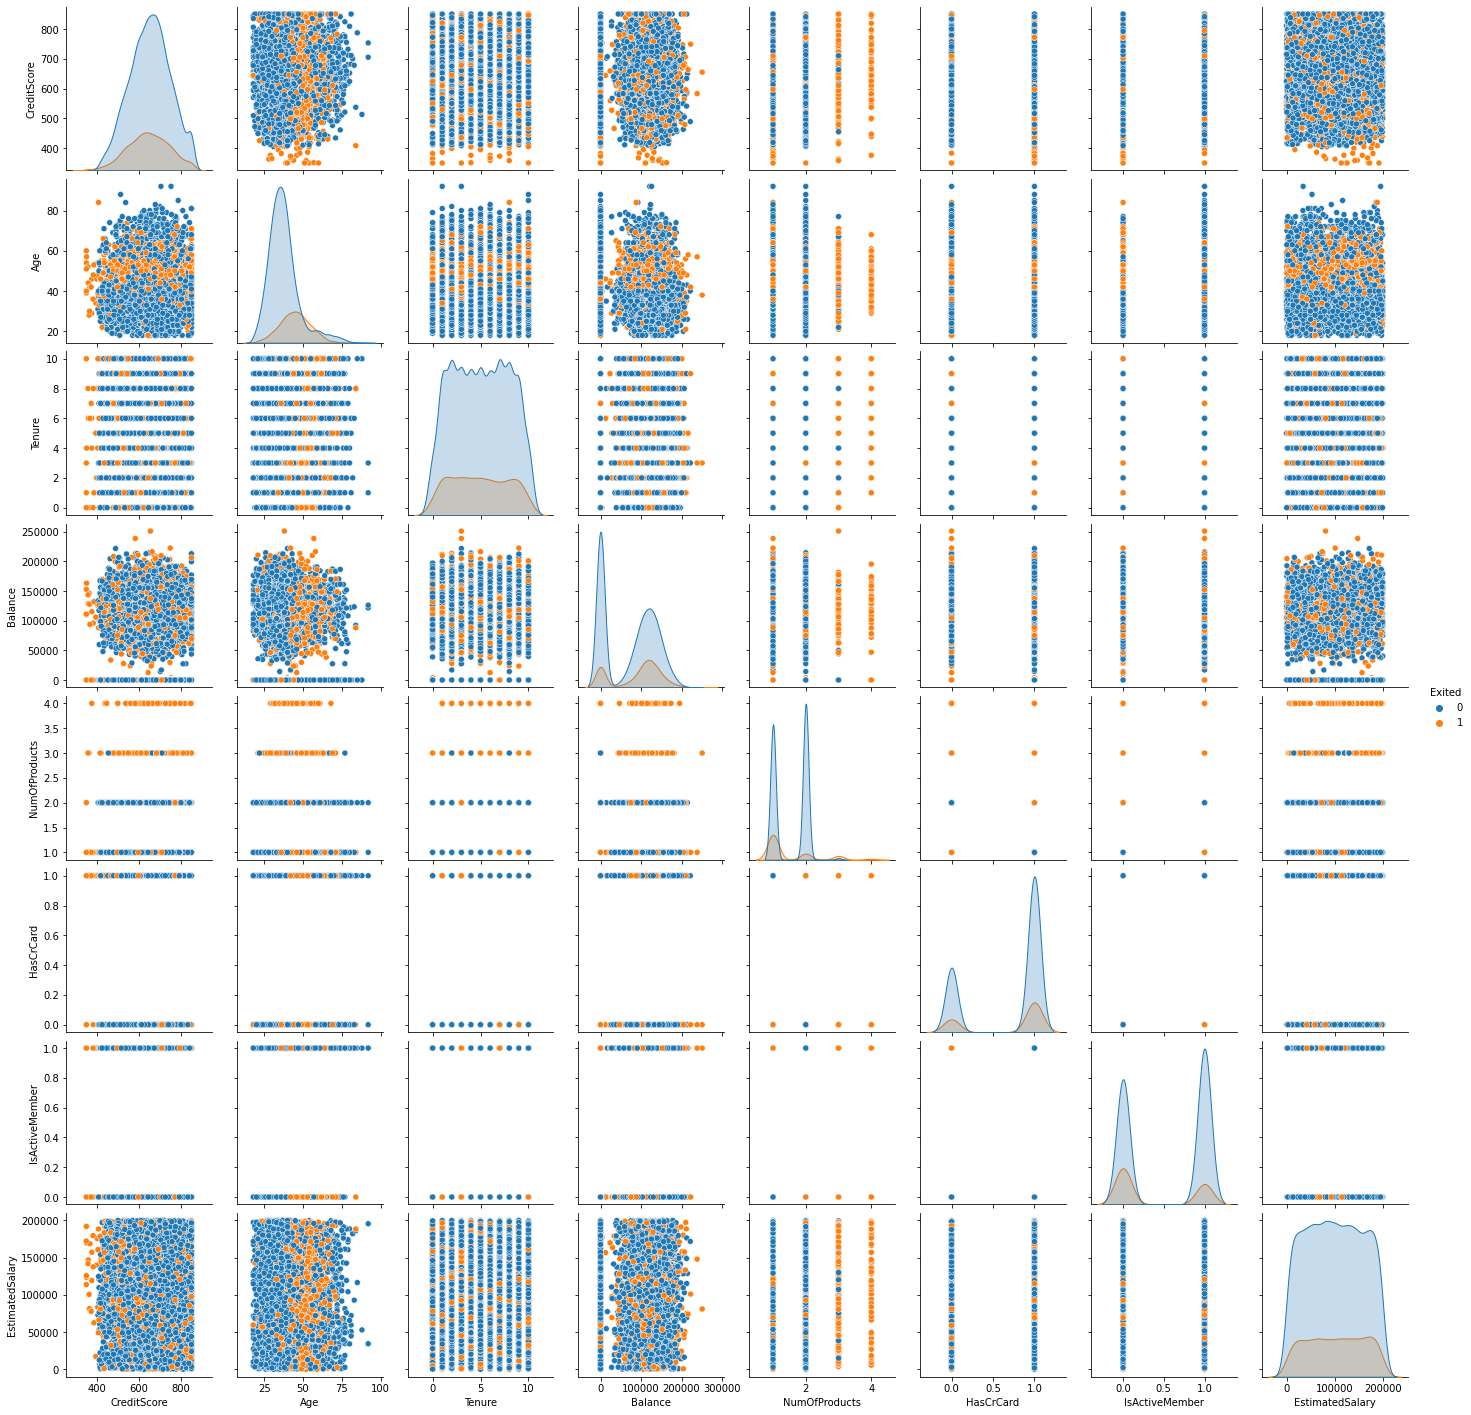

In [35]:
sns.pairplot(data=df,hue='Exited')
plt.show()

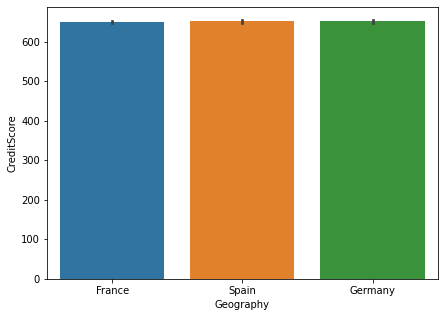

In [36]:
plt.figure(figsize=(7,5))
sns.barplot(data=df,x='Geography',y='CreditScore')
plt.show()

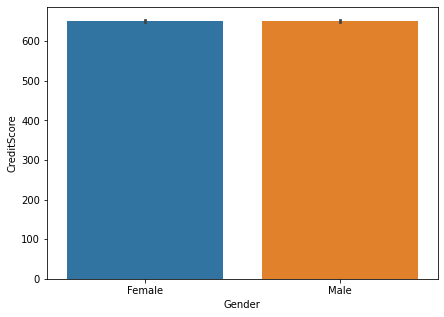

In [37]:
plt.figure(figsize=(7,5))
sns.barplot(data=df,x='Gender',y='CreditScore')
plt.show()

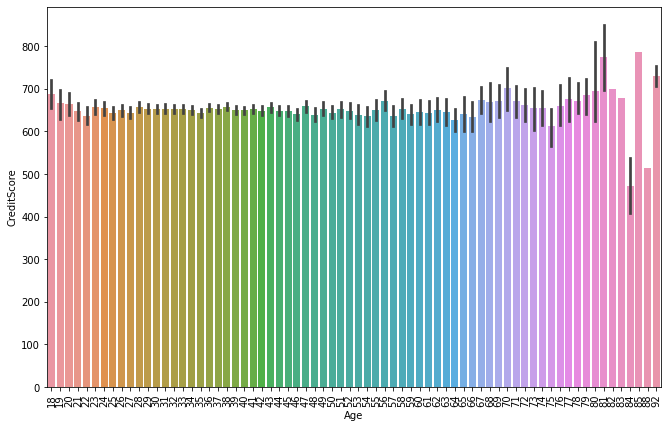

In [38]:
plt.figure(figsize=(11,7))
plt.xticks(rotation=90)
sns.barplot(data=df,x='Age',y='CreditScore')
plt.show()

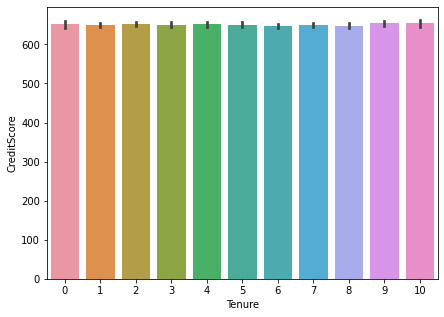

In [39]:
plt.figure(figsize=(7,5))
sns.barplot(data=df,x='Tenure',y='CreditScore')
plt.show()

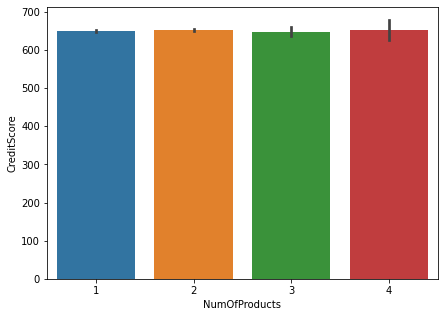

In [40]:
plt.figure(figsize=(7,5))
sns.barplot(data=df,x='NumOfProducts',y='CreditScore')
plt.show()

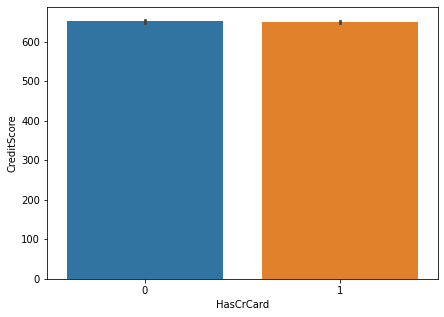

In [41]:
plt.figure(figsize=(7,5))
sns.barplot(data=df,x='HasCrCard',y='CreditScore')
plt.show()

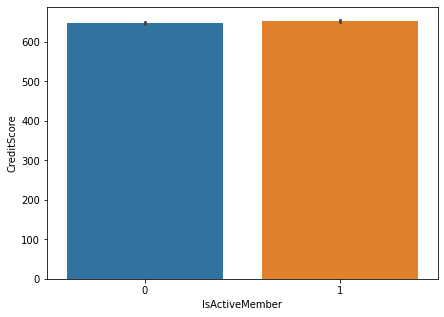

In [42]:
plt.figure(figsize=(7,5))
sns.barplot(data=df,x='IsActiveMember',y='CreditScore')
plt.show()

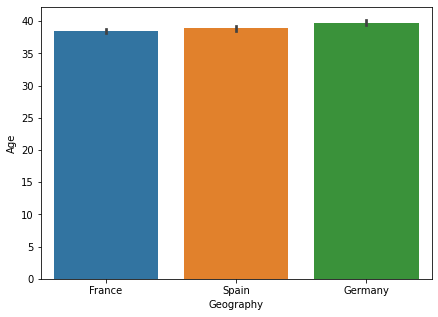

In [43]:
plt.figure(figsize=(7,5))
sns.barplot(data=df,x='Geography',y='Age')
plt.show()

In [44]:
df[df['Geography']=='Germany']['Age'].mean()

39.771622160223195

In [45]:
df[df['Geography']=='France']['Age'].mean()

38.51176705225369

In [46]:
df[df['Geography']=='Spain']['Age'].mean()

38.89099717400081

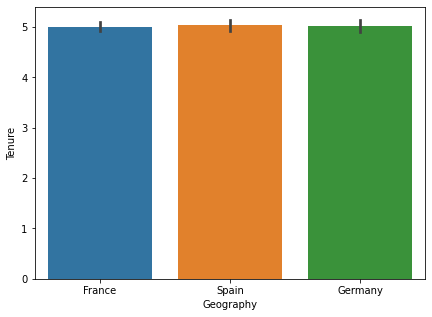

In [47]:
plt.figure(figsize=(7,5))
sns.barplot(data=df,x='Geography',y='Tenure')
plt.show()

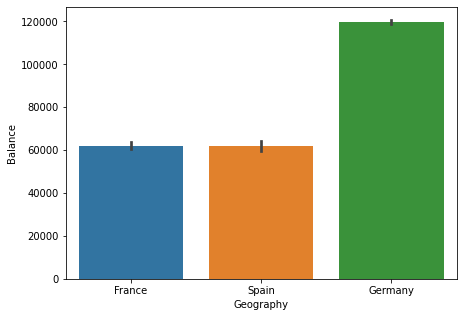

In [48]:
plt.figure(figsize=(7,5))
sns.barplot(data=df,x='Geography',y='Balance')
plt.show()

In [49]:
df[df['Geography']=='Germany']['Balance'].mean()

119730.1161339179

In [50]:
df[df['Geography']=='Spain']['Balance'].mean()

61818.14776342349

In [51]:
df[df['Geography']=='France']['Balance'].mean()

62092.63651575588

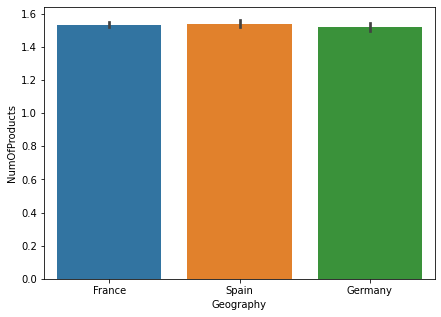

In [52]:
plt.figure(figsize=(7,5))
sns.barplot(data=df,x='Geography',y='NumOfProducts')
plt.show()

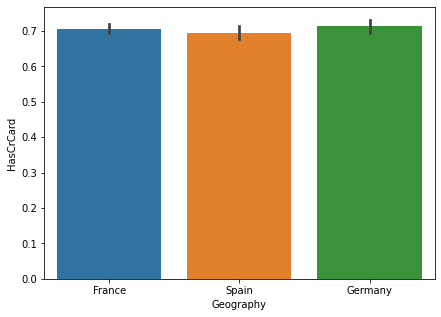

In [53]:
plt.figure(figsize=(7,5))
sns.barplot(data=df,x='Geography',y='HasCrCard')
plt.show()

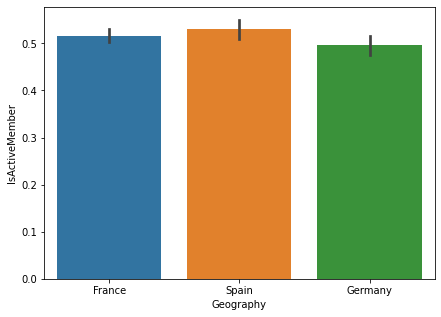

In [54]:
plt.figure(figsize=(7,5))
sns.barplot(data=df,x='Geography',y='IsActiveMember')
plt.show()

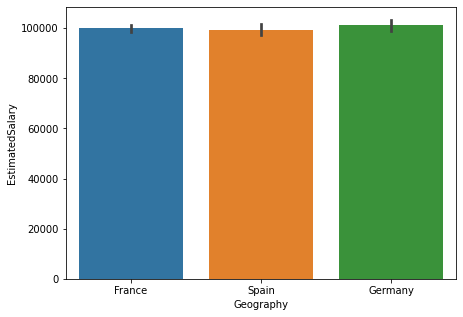

In [55]:
plt.figure(figsize=(7,5))
sns.barplot(data=df,x='Geography',y='EstimatedSalary')
plt.show()

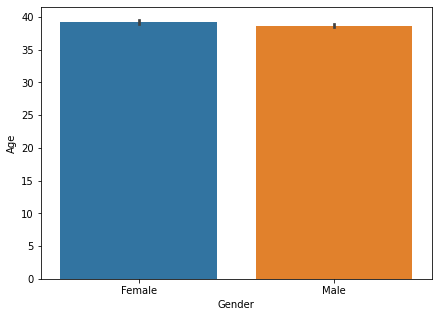

In [56]:
plt.figure(figsize=(7,5))
sns.barplot(data=df,x='Gender',y='Age')
plt.show()

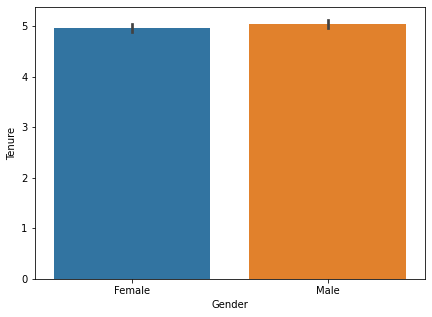

In [57]:
plt.figure(figsize=(7,5))
sns.barplot(data=df,x='Gender',y='Tenure')
plt.show()

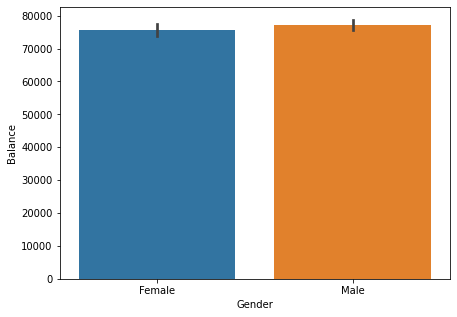

In [58]:
plt.figure(figsize=(7,5))
sns.barplot(data=df,x='Gender',y='Balance')
plt.show()

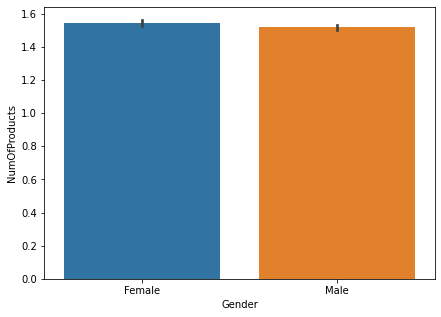

In [59]:
plt.figure(figsize=(7,5))
sns.barplot(data=df,x='Gender',y='NumOfProducts')
plt.show()

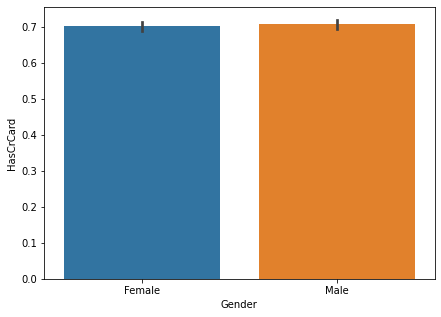

In [60]:
plt.figure(figsize=(7,5))
sns.barplot(data=df,x='Gender',y='HasCrCard')
plt.show()

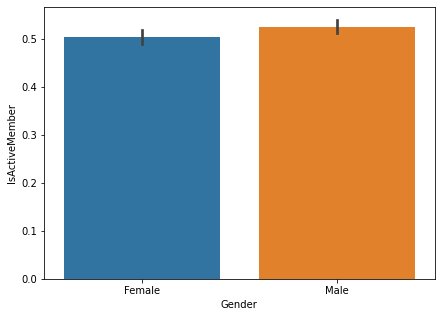

In [61]:
plt.figure(figsize=(7,5))
sns.barplot(data=df,x='Gender',y='IsActiveMember')
plt.show()

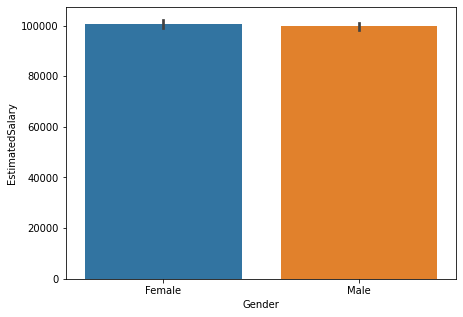

In [62]:
plt.figure(figsize=(7,5))
sns.barplot(data=df,x='Gender',y='EstimatedSalary')
plt.show()

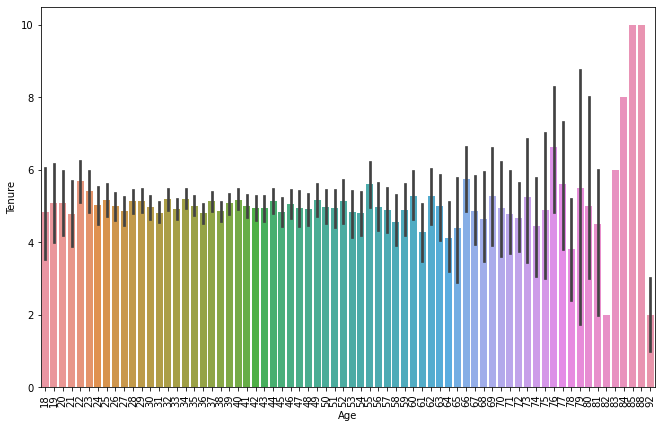

In [63]:
plt.figure(figsize=(11,7))
plt.xticks(rotation=90)
sns.barplot(data=df,x='Age',y='Tenure')
plt.show()

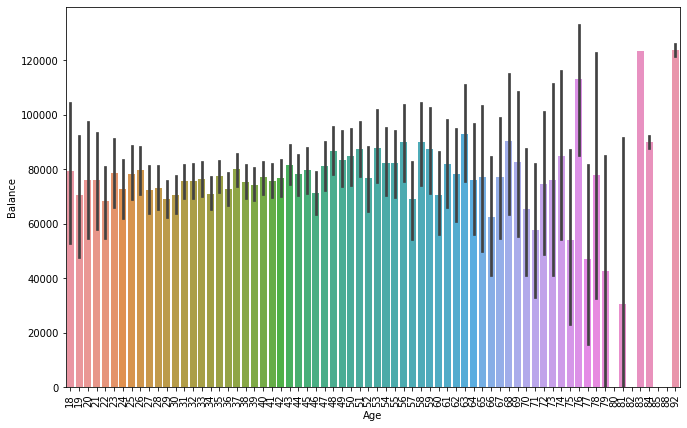

In [64]:
plt.figure(figsize=(11,7))
plt.xticks(rotation=90)
sns.barplot(data=df,x='Age',y='Balance')
plt.show()

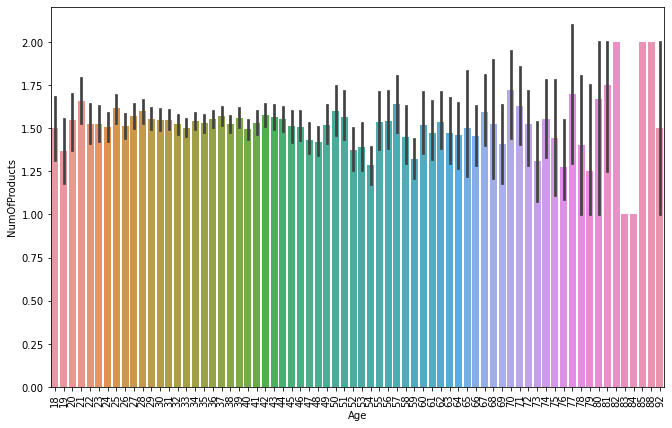

In [65]:
plt.figure(figsize=(11,7))
plt.xticks(rotation=90)
sns.barplot(data=df,x='Age',y='NumOfProducts')
plt.show()

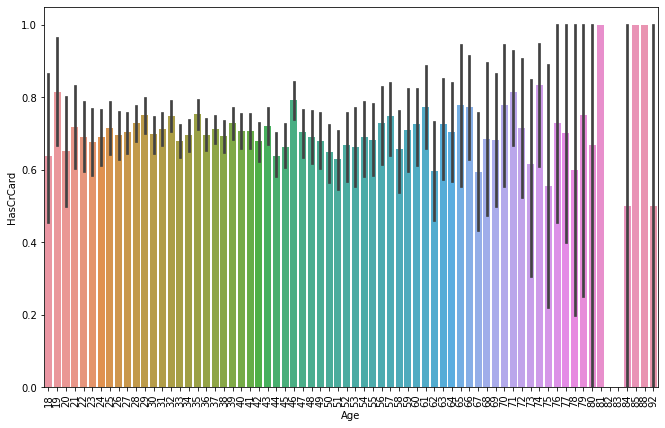

In [66]:
plt.figure(figsize=(11,7))
plt.xticks(rotation=90)
sns.barplot(data=df,x='Age',y='HasCrCard')
plt.show()

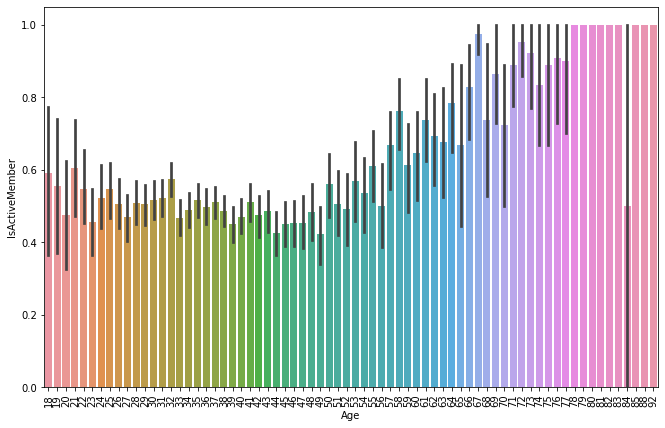

In [67]:
plt.figure(figsize=(11,7))
plt.xticks(rotation=90)
sns.barplot(data=df,x='Age',y='IsActiveMember')
plt.show()

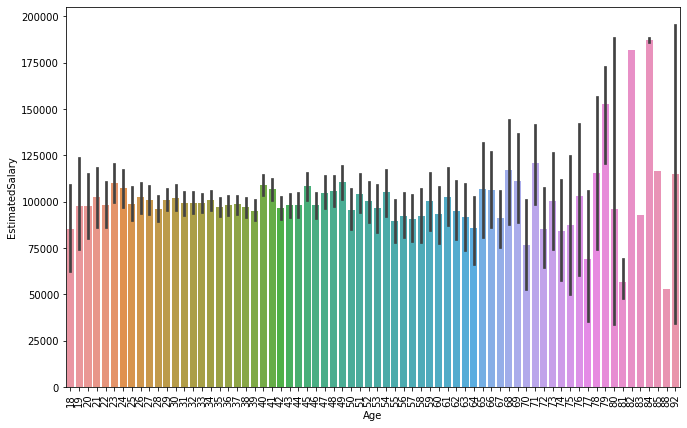

In [68]:
plt.figure(figsize=(11,7))
plt.xticks(rotation=90)
sns.barplot(data=df,x='Age',y='EstimatedSalary')
plt.show()

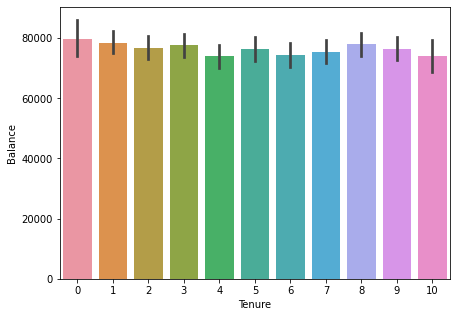

In [69]:
plt.figure(figsize=(7,5))
sns.barplot(data=df,x='Tenure',y='Balance')
plt.show()

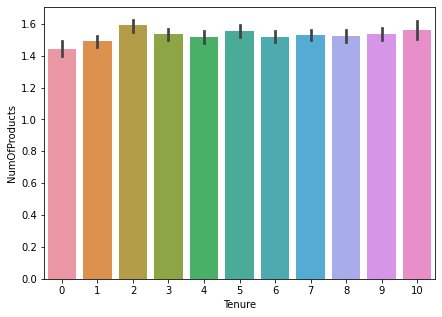

In [70]:
plt.figure(figsize=(7,5))
sns.barplot(data=df,x='Tenure',y='NumOfProducts')
plt.show()

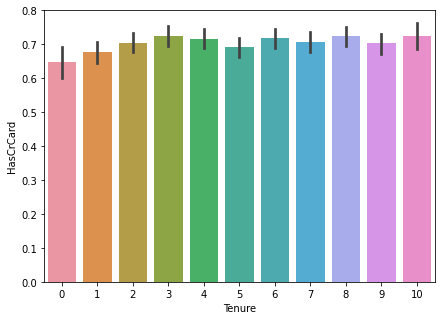

In [71]:
plt.figure(figsize=(7,5))
sns.barplot(data=df,x='Tenure',y='HasCrCard')
plt.show()

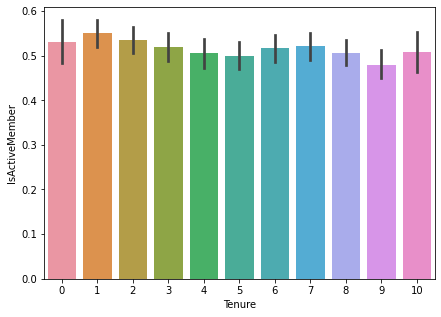

In [72]:
plt.figure(figsize=(7,5))
sns.barplot(data=df,x='Tenure',y='IsActiveMember')
plt.show()

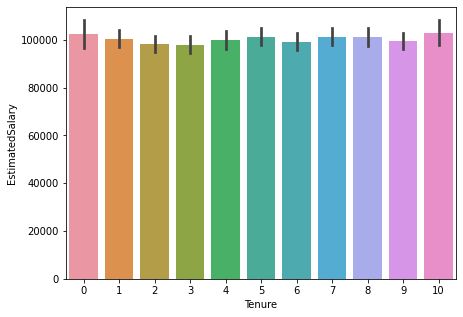

In [73]:
plt.figure(figsize=(7,5))
sns.barplot(data=df,x='Tenure',y='EstimatedSalary')
plt.show()

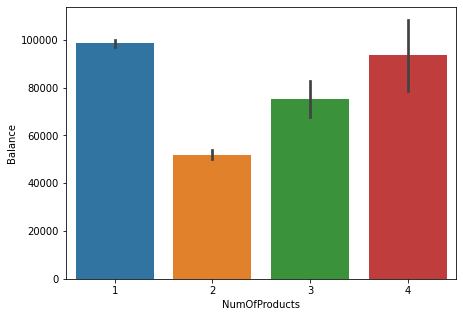

In [74]:
plt.figure(figsize=(7,5))
sns.barplot(data=df,x='NumOfProducts',y='Balance')
plt.show()

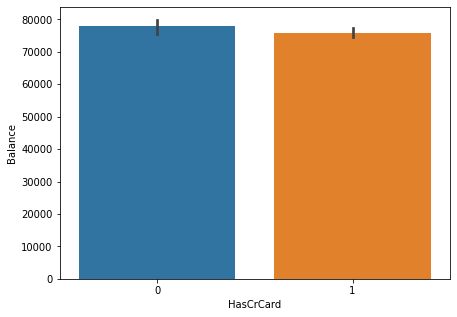

In [76]:
plt.figure(figsize=(7,5))
sns.barplot(data=df,x='HasCrCard',y='Balance')
plt.show()

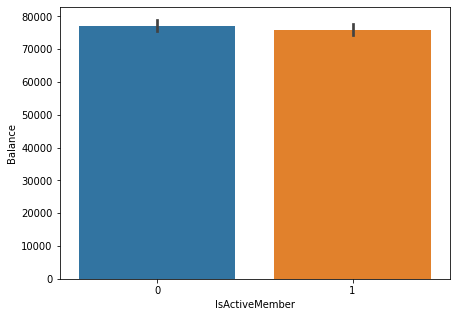

In [77]:
plt.figure(figsize=(7,5))
sns.barplot(data=df,x='IsActiveMember',y='Balance')
plt.show()

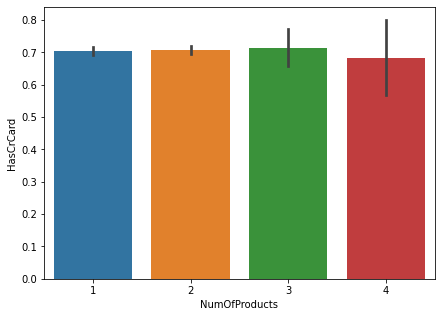

In [78]:
plt.figure(figsize=(7,5))
sns.barplot(data=df,x='NumOfProducts',y='HasCrCard')
plt.show()

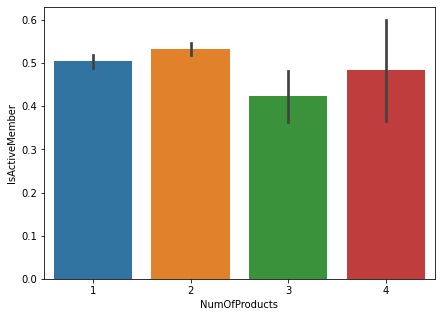

In [80]:
plt.figure(figsize=(7,5))
sns.barplot(data=df,x='NumOfProducts',y='IsActiveMember')
plt.show()

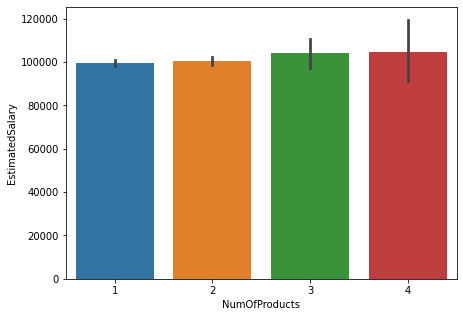

In [81]:
plt.figure(figsize=(7,5))
sns.barplot(data=df,x='NumOfProducts',y='EstimatedSalary')
plt.show()

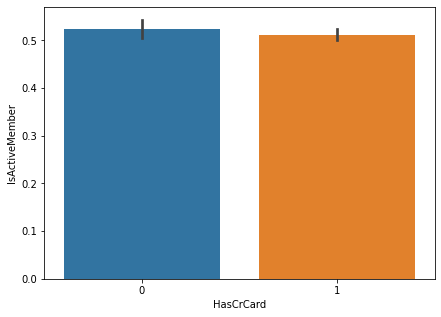

In [82]:
plt.figure(figsize=(7,5))
sns.barplot(data=df,x='HasCrCard',y='IsActiveMember')
plt.show()

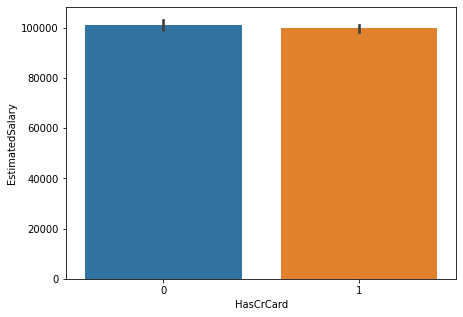

In [83]:
plt.figure(figsize=(7,5))
sns.barplot(data=df,x='HasCrCard',y='EstimatedSalary')
plt.show()

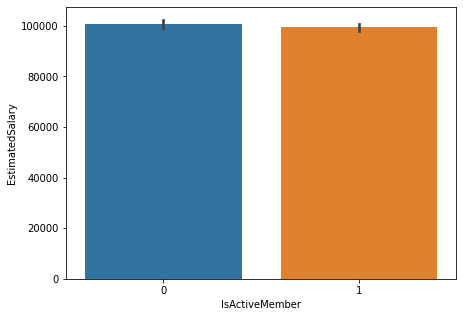

In [84]:
plt.figure(figsize=(7,5))
sns.barplot(data=df,x='IsActiveMember',y='EstimatedSalary')
plt.show()

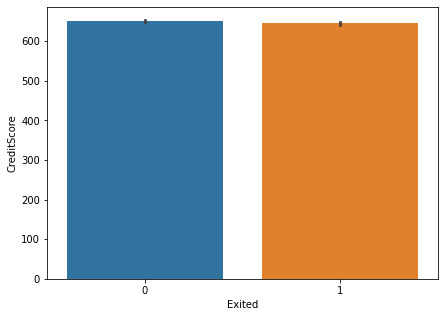

In [110]:
plt.figure(figsize=(7,5))
sns.barplot(data=df,x='Exited',y='CreditScore')
plt.show()

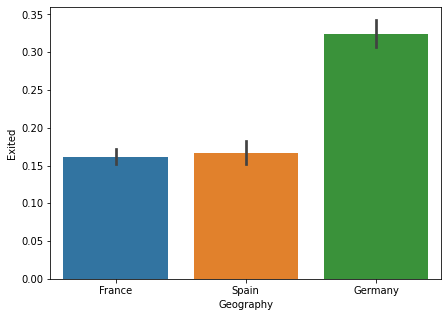

In [112]:
plt.figure(figsize=(7,5))
sns.barplot(data=df,x='Geography',y='Exited')
plt.show()

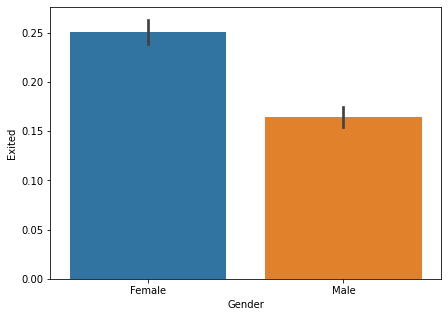

In [114]:
plt.figure(figsize=(7,5))
sns.barplot(data=df,x='Gender',y='Exited')
plt.show()

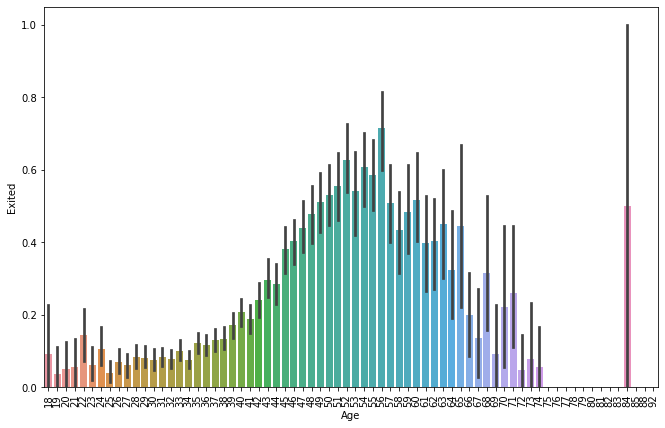

In [115]:
plt.figure(figsize=(11,7))
plt.xticks(rotation=90)
sns.barplot(data=df,x='Age',y='Exited')
plt.show()

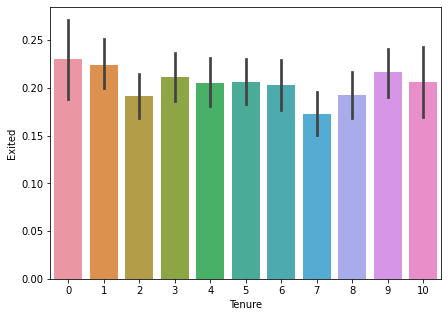

In [116]:
plt.figure(figsize=(7,5))
sns.barplot(data=df,x='Tenure',y='Exited')
plt.show()

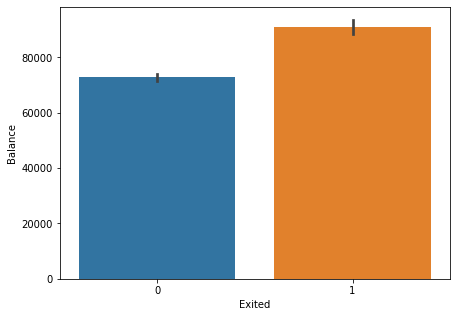

In [117]:
plt.figure(figsize=(7,5))
sns.barplot(data=df,x='Exited',y='Balance')
plt.show()

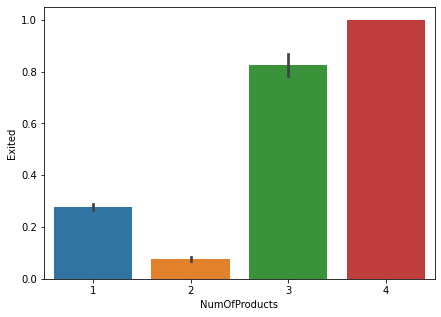

In [120]:
plt.figure(figsize=(7,5))
sns.barplot(data=df,x='NumOfProducts',y='Exited')
plt.show()

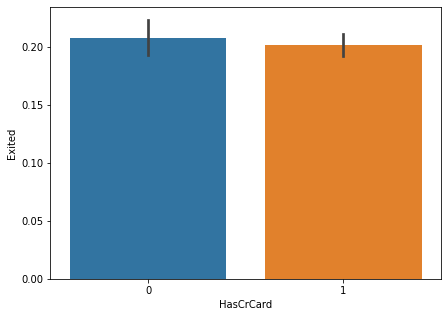

In [121]:
plt.figure(figsize=(7,5))
sns.barplot(data=df,x='HasCrCard',y='Exited')
plt.show()

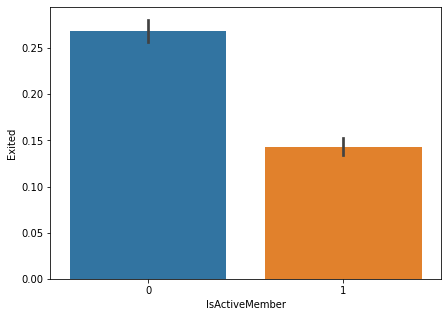

In [122]:
plt.figure(figsize=(7,5))
sns.barplot(data=df,x='IsActiveMember',y='Exited')
plt.show()

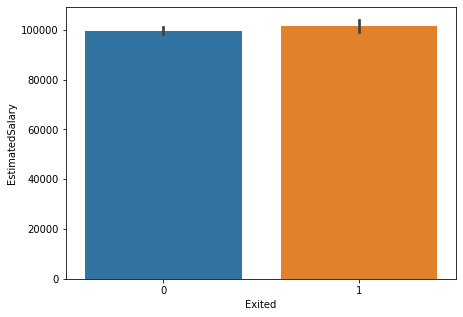

In [123]:
plt.figure(figsize=(7,5))
sns.barplot(data=df,x='Exited',y='EstimatedSalary')
plt.show()

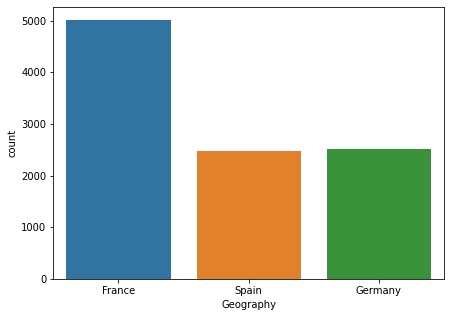

In [87]:
plt.figure(figsize=(7,5))
sns.countplot(data=df,x='Geography')
plt.show()

In [90]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

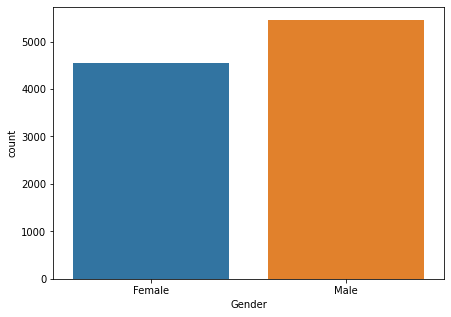

In [92]:
plt.figure(figsize=(7,5))
sns.countplot(data=df,x='Gender')
plt.show()

In [93]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

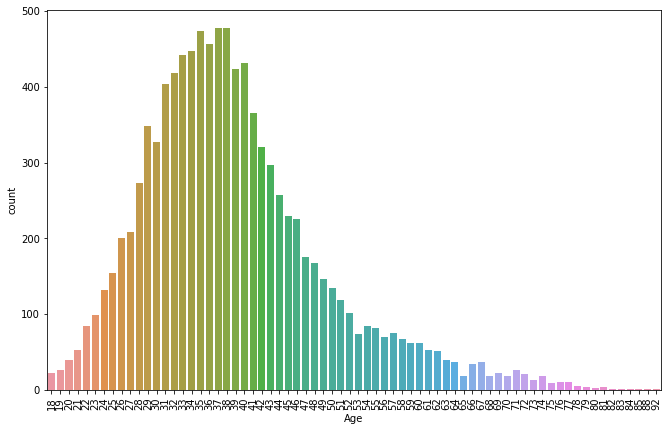

In [94]:
plt.figure(figsize=(11,7))
plt.xticks(rotation=90)
sns.countplot(data=df,x='Age')
plt.show()

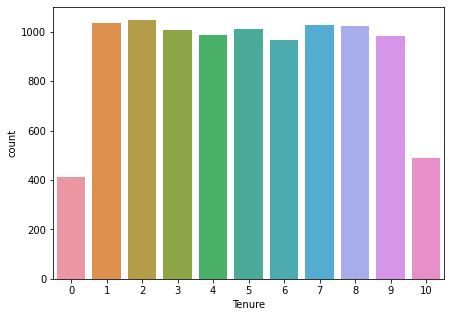

In [96]:
plt.figure(figsize=(7,5))
sns.countplot(data=df,x='Tenure')
plt.show()

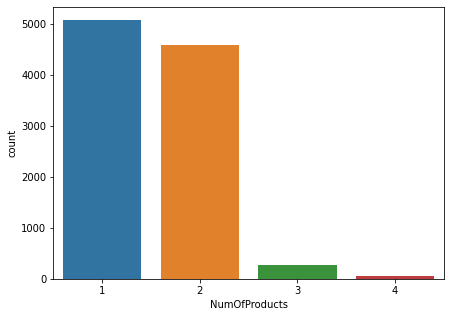

In [97]:
plt.figure(figsize=(7,5))
sns.countplot(data=df,x='NumOfProducts')
plt.show()

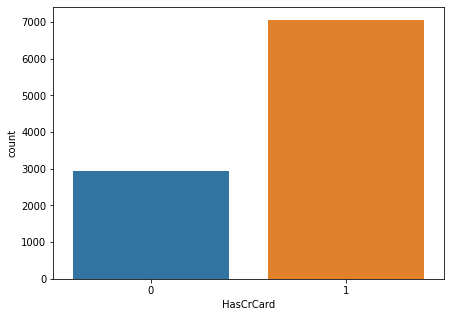

In [98]:
plt.figure(figsize=(7,5))
sns.countplot(data=df,x='HasCrCard')
plt.show()

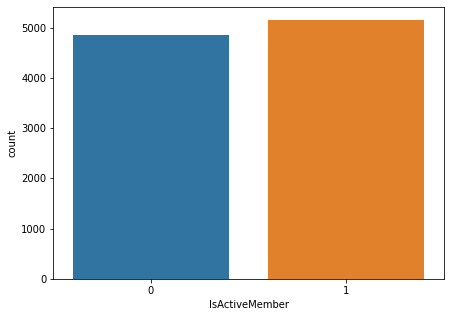

In [99]:
plt.figure(figsize=(7,5))
sns.countplot(data=df,x='IsActiveMember')
plt.show()

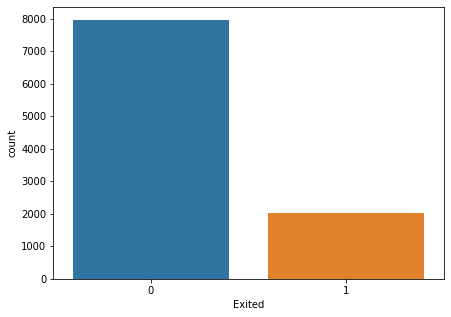

In [109]:
plt.figure(figsize=(7,5))
sns.countplot(data=df,x='Exited')
plt.show()

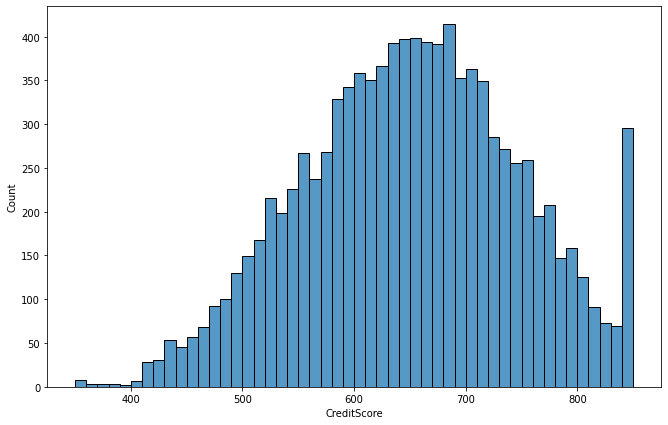

In [104]:
plt.figure(figsize=(11,7))
sns.histplot(data=df,x='CreditScore',bins=50)
plt.show()

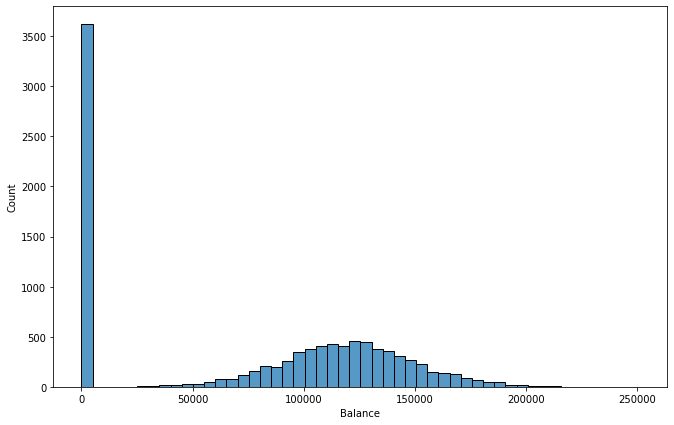

In [105]:
plt.figure(figsize=(11,7))
sns.histplot(data=df,x='Balance',bins=50)
plt.show()

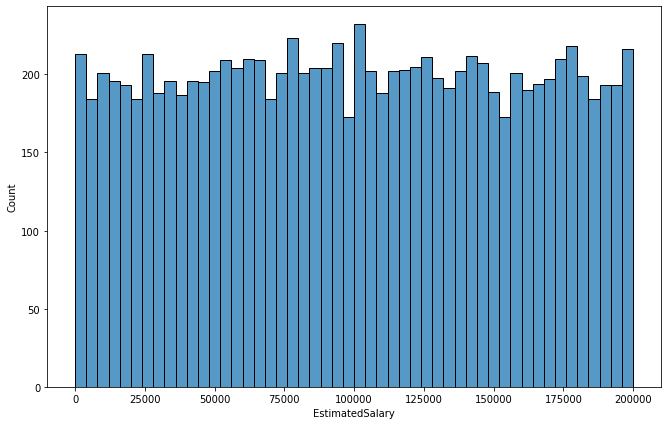

In [108]:
plt.figure(figsize=(11,7))
sns.histplot(data=df,x='EstimatedSalary',bins=50)
plt.show()

In [125]:
df.shape

(10000, 11)

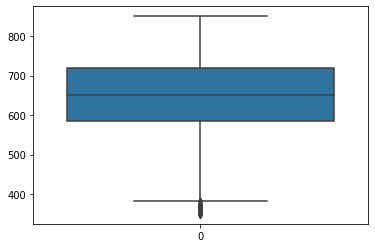

In [124]:
sns.boxplot(df['CreditScore'])
plt.show()

In [126]:
df[df['CreditScore']<400]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
942,376,France,Female,46,6,0.00,1,1,0,157333.69,1
1193,363,Spain,Female,28,6,146098.43,3,1,0,100615.14,1
1201,399,Germany,Male,46,2,127655.22,1,1,0,139994.68,1
1405,359,France,Female,44,6,128747.69,1,1,0,146955.71,1
1631,350,Spain,Male,54,1,152677.48,1,1,1,191973.49,1
1838,350,Germany,Male,39,0,109733.20,2,0,0,123602.11,1
1962,358,Spain,Female,52,8,143542.36,3,1,0,141959.11,1
2473,351,Germany,Female,57,4,163146.46,1,1,0,169621.69,1
2579,365,Germany,Male,30,0,127760.07,1,1,0,81537.85,1


In [127]:
df=df[df['CreditScore']>400]

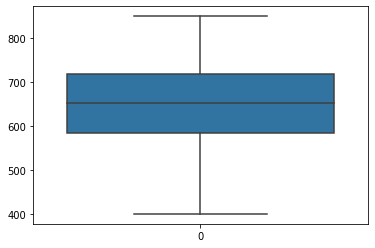

In [128]:
sns.boxplot(df['CreditScore'])
plt.show()

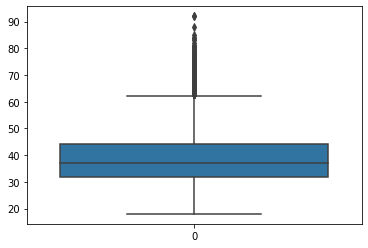

In [129]:
sns.boxplot(df['Age'])
plt.show()

In [130]:
df[df['Age']>62]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
58,511,Spain,Female,66,4,0.00,1,1,0,1643.11,1
85,652,Spain,Female,75,10,0.00,2,1,1,114675.75,0
104,670,Spain,Female,65,1,0.00,1,1,1,177655.68,1
158,646,France,Female,73,6,97259.25,1,0,1,104719.66,0
181,510,France,Male,65,2,0.00,2,1,1,48071.61,0
...,...,...,...,...,...,...,...,...,...,...,...
9753,656,Germany,Male,68,7,153545.11,1,1,1,186574.68,0
9765,445,France,Male,64,2,136770.67,1,0,1,43678.06,0
9832,595,Germany,Female,64,2,105736.32,1,1,1,89935.73,1
9894,521,France,Female,77,6,0.00,2,1,1,49054.10,0


In [132]:
df=df[df['Age']<62]

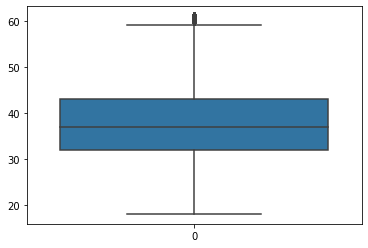

In [133]:
sns.boxplot(df['Age'])
plt.show()

In [134]:
df[df['Age']>58]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
42,556,France,Female,61,2,117419.35,1,1,1,94153.83,0
44,660,Spain,Female,61,5,155931.11,1,1,1,158338.39,0
313,806,Germany,Female,59,0,135296.33,1,1,0,182822.50,0
347,643,Germany,Male,59,3,170331.37,1,1,1,32171.79,0
416,487,Germany,Female,61,5,110368.03,1,0,0,11384.45,1
...,...,...,...,...,...,...,...,...,...,...,...
9595,597,France,Male,61,5,0.00,2,1,1,81299.17,0
9602,634,Germany,Female,59,3,95727.05,1,0,0,97939.40,1
9751,681,France,Male,59,4,122781.51,1,0,1,140166.95,0
9761,807,Germany,Female,60,1,72948.58,2,1,1,17355.36,0


In [135]:
df=df[df['Age']<58]

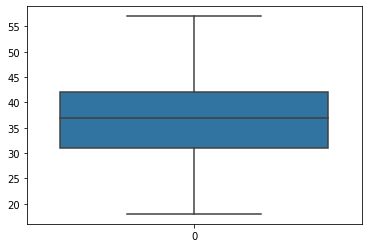

In [136]:
sns.boxplot(df['Age'])
plt.show()

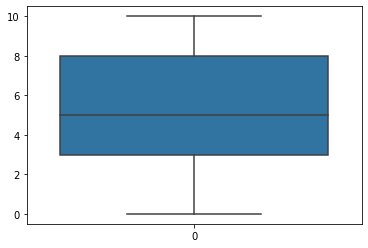

In [137]:
sns.boxplot(df['Tenure'])
plt.show()

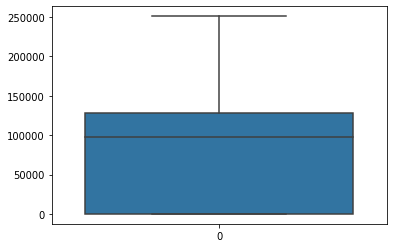

In [138]:
sns.boxplot(df['Balance'])
plt.show()

In [140]:
df[df['Balance']==0].value_counts().sum()

3385

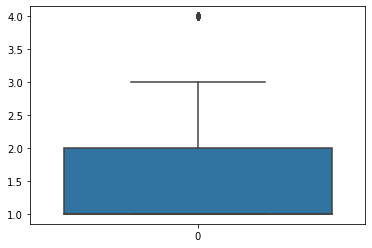

In [141]:
sns.boxplot(df['NumOfProducts'])
plt.show()

In [145]:
df[df['NumOfProducts']==4].value_counts().sum()

53

In [146]:
df=df[df['NumOfProducts']<4]

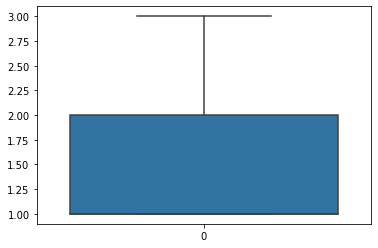

In [147]:
sns.boxplot(df['NumOfProducts'])
plt.show()

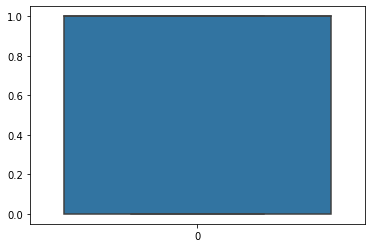

In [148]:
sns.boxplot(df['HasCrCard'])
plt.show()

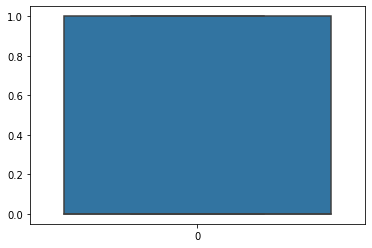

In [149]:
sns.boxplot(df['IsActiveMember'])
plt.show()

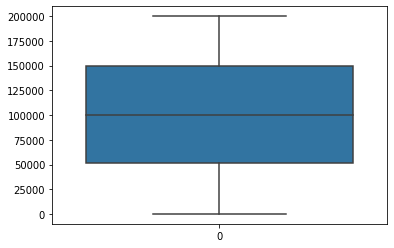

In [150]:
sns.boxplot(df['EstimatedSalary'])
plt.show()

In [158]:
df.duplicated().sum()

0

In [159]:
df.shape

(9274, 11)

In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9274 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      9274 non-null   int64  
 1   Geography        9274 non-null   object 
 2   Gender           9274 non-null   object 
 3   Age              9274 non-null   int64  
 4   Tenure           9274 non-null   int64  
 5   Balance          9274 non-null   float64
 6   NumOfProducts    9274 non-null   int64  
 7   HasCrCard        9274 non-null   int64  
 8   IsActiveMember   9274 non-null   int64  
 9   EstimatedSalary  9274 non-null   float64
 10  Exited           9274 non-null   int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 1.1+ MB


In [161]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,9274.000000,9274.000000,9274.000000,9274.000000,9274.000000,9274.000000,9274.000000,9274.000000,9274.000000
mean,650.892495,37.040220,5.020056,76249.012987,1.519409,0.705521,0.497736,100199.004536,0.189778
std,95.845932,7.979052,2.888232,62448.463531,0.549600,0.455833,0.500022,57470.292775,0.392146
min,401.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,584.000000,31.000000,3.000000,0.000000,1.000000,0.000000,0.000000,51359.700000,0.000000
50%,652.000000,37.000000,5.000000,96950.710000,1.000000,1.000000,0.000000,100329.780000,0.000000
75%,717.000000,42.000000,7.000000,127558.190000,2.000000,1.000000,1.000000,149414.455000,0.000000
max,850.000000,57.000000,10.000000,250898.090000,3.000000,1.000000,1.000000,199992.480000,1.000000


In [162]:
corr_matrix=df.corr()['Exited']
corr_matrix

C:\Users\power\AppData\Local\Temp\ipykernel_1152\3118902230.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix=df.corr()['Exited']


CreditScore       -0.017189
Age                0.352448
Tenure            -0.013549
Balance            0.114910
NumOfProducts     -0.105156
HasCrCard         -0.007069
IsActiveMember    -0.135302
EstimatedSalary    0.009688
Exited             1.000000
Name: Exited, dtype: float64

In [172]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [187]:
df.isnull().sum()

CreditScore          0
Gender               0
Age                  0
Tenure               0
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
Geography_Germany    0
Geography_Spain      0
dtype: int64

In [177]:
for col in df.columns:
    if df[col].dtype=='object':
        print(f'{col}:{df[col].nunique()}')

Geography:3
Gender:2


In [178]:
for col in df.columns:
    if df[col].dtype!='object':
        print(f'{col}:{df[col].nunique()}')

CreditScore:445
Age:40
Tenure:11
Balance:5900
NumOfProducts:3
HasCrCard:2
IsActiveMember:2
EstimatedSalary:9273
Exited:2


In [180]:
df['Gender'].value_counts()

Male      5071
Female    4203
Name: Gender, dtype: int64

In [181]:
df['Gender']=df['Gender'].replace({'Male':0,'Female':1})

In [182]:
df['Gender'].value_counts()

0    5071
1    4203
Name: Gender, dtype: int64

In [184]:
df=pd.get_dummies(data=df,columns=['Geography'],drop_first=True)

In [185]:
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,619,1,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,1,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,1,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,1,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,1,43,2,125510.82,1,1,1,79084.10,0,0,1


In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9274 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        9274 non-null   int64  
 1   Gender             9274 non-null   int64  
 2   Age                9274 non-null   int64  
 3   Tenure             9274 non-null   int64  
 4   Balance            9274 non-null   float64
 5   NumOfProducts      9274 non-null   int64  
 6   HasCrCard          9274 non-null   int64  
 7   IsActiveMember     9274 non-null   int64  
 8   EstimatedSalary    9274 non-null   float64
 9   Exited             9274 non-null   int64  
 10  Geography_Germany  9274 non-null   uint8  
 11  Geography_Spain    9274 non-null   uint8  
dtypes: float64(2), int64(8), uint8(2)
memory usage: 1.0 MB


In [188]:
cols_to_scale=['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']

In [189]:
scaler=MinMaxScaler()
df[cols_to_scale]=scaler.fit_transform(df[cols_to_scale])

In [190]:
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,0.485523,1,0.615385,0.2,0.000000,0.0,1,1,0.506735,1,0,0
1,0.461024,1,0.589744,0.1,0.334031,0.0,0,1,0.562709,0,0,1
2,0.224944,1,0.615385,0.8,0.636357,1.0,1,0,0.569654,1,0,0
3,0.663697,1,0.538462,0.1,0.000000,0.5,0,0,0.469120,0,0,0
4,1.000000,1,0.641026,0.2,0.500246,0.0,1,1,0.395400,0,0,1


In [192]:
X=df.drop('Exited',axis=1)
y=df['Exited']

In [193]:
y.value_counts()

0    7514
1    1760
Name: Exited, dtype: int64

In [195]:
smote=SMOTE(sampling_strategy='minority')
X_sm,y_sm=smote.fit_resample(X,y)

In [196]:
y_sm.value_counts()

1    7514
0    7514
Name: Exited, dtype: int64

In [199]:
X_sm.value_counts().sum()

15028

In [200]:
X_train,X_test,y_train,y_test=train_test_split(X_sm,y_sm,test_size=0.2,random_state=42,stratify=y_sm)

In [201]:
y_train.value_counts()

1    6011
0    6011
Name: Exited, dtype: int64

In [202]:
y_test.value_counts()

0    1503
1    1503
Name: Exited, dtype: int64

In [203]:
X_train.value_counts().sum()

12022

In [204]:
X_test.value_counts().sum()

3006

In [206]:
X_train.shape

(12022, 11)

In [207]:
X_test.shape

(3006, 11)

In [209]:
model=Sequential([
    layers.Dense(300,input_shape=(11,),activation='relu'),
    layers.Dense(200,activation='relu'),
    layers.Dense(100,activation='relu'),
    layers.Dense(2,activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
             )

model.fit(X_train,y_train,epochs=100)

Epoch 1/100
376/376 [==============================] - 2s 3ms/step - loss: 0.5258 - accuracy: 0.7400
Epoch 2/100
376/376 [==============================] - 1s 3ms/step - loss: 0.4617 - accuracy: 0.7792
Epoch 3/100
376/376 [==============================] - 1s 3ms/step - loss: 0.4492 - accuracy: 0.7871
Epoch 4/100
376/376 [==============================] - 1s 3ms/step - loss: 0.4408 - accuracy: 0.7948
Epoch 5/100
376/376 [==============================] - 1s 3ms/step - loss: 0.4306 - accuracy: 0.7985
Epoch 6/100
376/376 [==============================] - 1s 3ms/step - loss: 0.4230 - accuracy: 0.8015
Epoch 7/100
376/376 [==============================] - 1s 3ms/step - loss: 0.4146 - accuracy: 0.8086
Epoch 8/100
376/376 [==============================] - 1s 3ms/step - loss: 0.4026 - accuracy: 0.8134
Epoch 9/100
376/376 [==============================] - 1s 3ms/step - loss: 0.3928 - accuracy: 0.8188
Epoch 10/100
376/376 [==============================] - 1s 4ms/step - loss: 0.3843 - accura

In [210]:
model.evaluate(X_test,y_test)

94/94 [==============================] - 0s 2ms/step - loss: 0.5281 - accuracy: 0.9025


[0.5281457304954529, 0.9025282859802246]

In [211]:
y_pred=model.predict(X_test)

94/94 [==============================] - 0s 2ms/step


In [212]:
y_pred[:5]

array([[9.9961722e-01, 3.8278225e-04],
       [1.0000000e+00, 5.8217166e-18],
       [9.9999499e-01, 4.9496657e-06],
       [1.0510470e-03, 9.9894899e-01],
       [9.9999654e-01, 3.4995660e-06]], dtype=float32)

In [213]:
y_predicted=[np.argmax(i) for i in y_pred]
y_predicted[:5]

[0, 0, 0, 1, 0]

In [214]:
y_test[:5]

5379     0
8222     0
3882     0
13868    1
569      0
Name: Exited, dtype: int64

In [217]:
print(classification_report(y_predicted,y_test))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90      1406
           1       0.93      0.88      0.91      1600

    accuracy                           0.90      3006
   macro avg       0.90      0.90      0.90      3006
weighted avg       0.90      0.90      0.90      3006



In [218]:
print(confusion_matrix(y_predicted,y_test))

[[1308   98]
 [ 195 1405]]


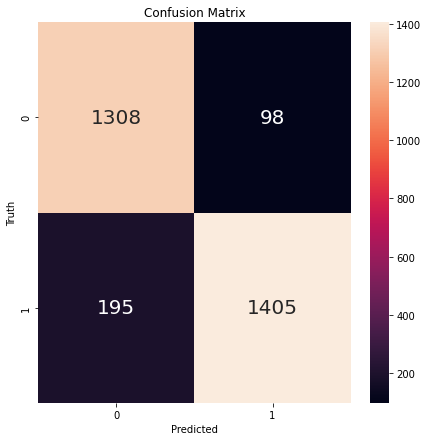

In [223]:
con_m=confusion_matrix(y_predicted,y_test)
plt.figure(figsize=(7,7))
sns.heatmap(con_m,annot=True,fmt='d',annot_kws={'size':20})
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()